In [2]:
import pandas as pd
from py2neo import Graph, Node, Relationship, NodeMatcher
# graph = Graph(host="localhost://7474", auth=("neo4j", "jc147369"))
graph = Graph(host="localhost://7474")

In [7]:
# ?graph
print(graph.nodes)

In [8]:
# 读取csv文件
movies_df = pd.read_csv(r'./data/movie_cn/movies.csv')
actors_df = pd.read_csv(r'./data/movie_cn/actors.csv')

In [9]:
# 创建电影节
for i in range(movies_df.shape[0]):
    rank = str(movies_df.iloc[i, :]['rank'])
    name = movies_df.iloc[i, :]['name']
    box_office = movies_df.iloc[i, :]['box_office']
    avg_price = str(movies_df.iloc[i, :]['avg_price'])
    avg_people = str(movies_df.iloc[i, :]['avg_people'])
    begin_date = movies_df.iloc[i, :]['begin_date']
    
    node = Node("Movie", 
                name=name,
                rank=rank,
                box_office=box_office,
                avg_price=avg_price,
                avg_people=avg_people,
                begin_date=begin_date
                )
    # print(movies_df.iloc[i, :]['rank'])
    graph.create(node)

print('create movie nodes successfully!')

# 创建演员节点
all_actors = set()
for i in range(actors_df.shape[0]):
    actor_list = actors_df.iloc[i, :]['actors'].split('，')
    for actor in actor_list:
        all_actors.add(actor)
 
for actor in all_actors:
    node = Node("Actor", name=actor)
    graph.create(node)

print('create actor nodes successfully!')


# 创建演员——电影关系
for i in range(actors_df.shape[0]):
    name = actors_df.iloc[i, :]['name']
    matcher = NodeMatcher(graph)
    movie_node = matcher.match("Movie", name=name).first()
    actors = actors_df.iloc[i, :]['actors'].split('，')
    # print(name, actors)
    for actor in actors:
        actor_node = matcher.match("Actor", name=actor).first()
        relationship = Relationship(actor_node, 'ACT_IN', movie_node)
        graph.create(relationship)

print('create relationships successfully!')
print('You can check Neo4j now!')

create movie nodes successfully!
create actor nodes successfully!
create relationships successfully!
You can check Neo4j now!


In [10]:
# open http://localhost:7474/browser/

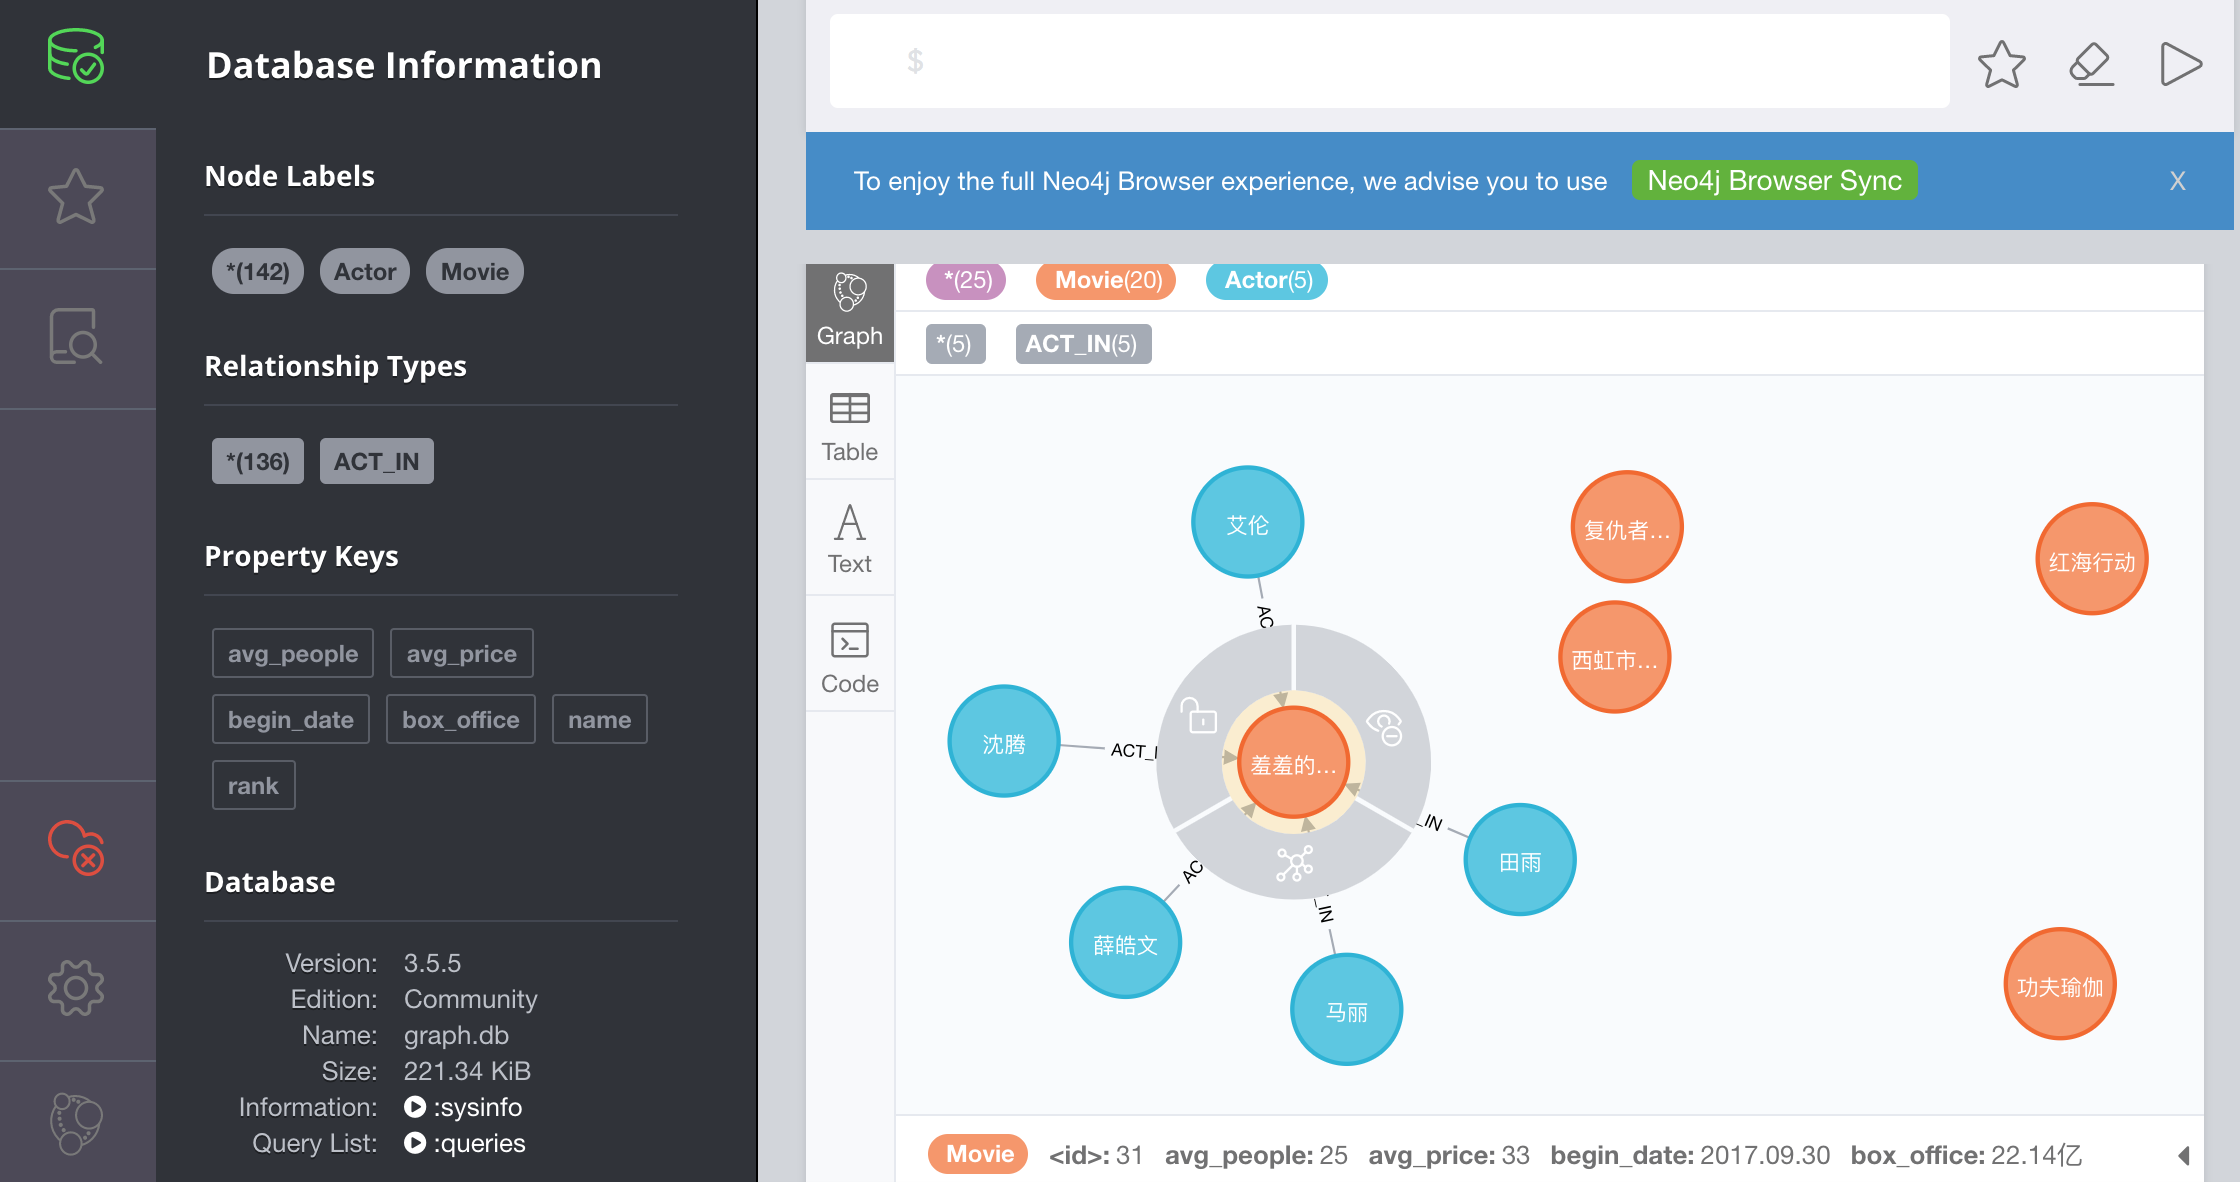